In [134]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting to know the data set

In [2]:
# load data set
df = pd.read_csv("Wisconsin.csv")

# drop patient id from dataset
df.drop('id', axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 31)

In [4]:
balance = df.diagnosis.value_counts()
balance

B    357
M    212
Name: diagnosis, dtype: int64

Data set is slightly imbalanced, majority of cells are benign.

In [5]:
balance[0]/balance.sum()

0.62741652021089633

In [254]:
# split into labels Y and instances X
Y = df.values[:, 0]
# 1 is positive => malign => patient has
Y = np.array(list(1. if i=='M' else 0. for i in Y)).astype('float')
X = df.values[:, 1:].astype('float64')
%precision 2
print(Y[0:8])
print(X[0:8, :5])
print(Y.shape, X.shape)

[ 1.  1.  1.  1.  1.  1.  1.  1.]
[[  1.80e+01   1.04e+01   1.23e+02   1.00e+03   1.18e-01]
 [  2.06e+01   1.78e+01   1.33e+02   1.33e+03   8.47e-02]
 [  1.97e+01   2.12e+01   1.30e+02   1.20e+03   1.10e-01]
 [  1.14e+01   2.04e+01   7.76e+01   3.86e+02   1.42e-01]
 [  2.03e+01   1.43e+01   1.35e+02   1.30e+03   1.00e-01]
 [  1.24e+01   1.57e+01   8.26e+01   4.77e+02   1.28e-01]
 [  1.82e+01   2.00e+01   1.20e+02   1.04e+03   9.46e-02]
 [  1.37e+01   2.08e+01   9.02e+01   5.78e+02   1.19e-01]]
(569,) (569, 30)


In [114]:
# balanca data, might be useful later
X_false = X[Y==0]
X_true = X[Y==1]
X_true.shape
X_balanced = np.concatenate([X_false[0:212], X_true])
Y_balanced = np.array(212*[0]+212*[1])

X_balanced.shape, Y_balanced.shape

((424, 30), (424,))

## Exploratory Data Analysis

## Nearest Neighbor Classifier

In [122]:
from sklearn import datasets, neighbors, svm, preprocessing
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline

In [123]:
# 10 fold cross validation
# see http://scikit-learn.org/stable/modules/cross_validation.html
# and http://scikit-learn.org/stable/modules/model_evaluation.html
def cross_validate_with_statistics(classifier, X, Y):

    score_list = ['f1', 'precision', 'recall', 'accuracy']
    scores = cross_validate(classifier, X, Y, 
                            cv=KFold(10, shuffle=True, random_state=42), 
                            scoring=score_list, return_train_score=True,
                            )
    
    # get mean and std of 
    means = {s:np.mean(scores[s]) for s in scores}
    stds = {s:np.std(scores[s]) for s in scores}

    return means, stds

In [224]:
def nearest_neighbor(X, Y):
    # instantiate nearest neighbor classifier
    nn = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute')
    # standardise data to 0 mean and 1 variance
    nn = make_pipeline(preprocessing.StandardScaler(), nn)
    nn_means, nn_stds = cross_validate_with_statistics(nn, X, Y)

    return nn_means, nn_stds

nearest_neighbor(X_balanced, Y_balanced)

({'fit_time': 0.00,
  'score_time': 0.00,
  'test_accuracy': 0.94,
  'test_f1': 0.94,
  'test_precision': 0.94,
  'test_recall': 0.94,
  'train_accuracy': 1.00,
  'train_f1': 1.00,
  'train_precision': 1.00,
  'train_recall': 1.00},
 {'fit_time': 0.00,
  'score_time': 0.00,
  'test_accuracy': 0.03,
  'test_f1': 0.03,
  'test_precision': 0.05,
  'test_recall': 0.06,
  'train_accuracy': 0.00,
  'train_f1': 0.00,
  'train_precision': 0.00,
  'train_recall': 0.00})

As always with NN, training error is 0.

In [257]:
# now do k nearest neighbour
def k_nearest_neighbor(X, Y, ks):
    
    # for each k, [accuracy, precision, and recall] as mean and std
    scores_knn = np.zeros((len(ks), 3, 2))
    for i, k in enumerate(ks):
        # instantiate nearest neighbor classifier
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, algorithm='brute',
                                            metric='euclidean')
        # standardise data to 0 mean and 1 variance
        knn = make_pipeline(preprocessing.StandardScaler(), knn)
        means_knn, stds_knn = cross_validate_with_statistics(knn, X, Y)

        scores_knn[i, 0, 0] = means_knn['test_accuracy']
        scores_knn[i, 1, 0] = means_knn['test_precision']
        scores_knn[i, 2, 0] = means_knn['test_recall'] 

        scores_knn[i, 0, 1] = stds_knn['test_accuracy']
        scores_knn[i, 1, 1] = stds_knn['test_precision']
        scores_knn[i, 2, 1] = stds_knn['test_recall']
    
    return scores_knn

ks = list(range(1,10+1)) + [20, 40, 50, 100, 150, 200, 250, 300, 350]
knn_res = k_nearest_neighbor(X, Y, ks)

In [258]:
knn_res[:,:,0]

array([[ 0.95,  0.93,  0.91],
       [ 0.95,  0.99,  0.88],
       [ 0.96,  0.98,  0.91],
       [ 0.96,  0.99,  0.9 ],
       [ 0.96,  0.98,  0.92],
       [ 0.96,  0.99,  0.91],
       [ 0.96,  0.98,  0.92],
       [ 0.96,  0.99,  0.91],
       [ 0.97,  0.99,  0.93],
       [ 0.97,  0.99,  0.93],
       [ 0.95,  0.99,  0.89],
       [ 0.95,  0.99,  0.87],
       [ 0.95,  0.99,  0.87],
       [ 0.93,  0.98,  0.83],
       [ 0.91,  0.98,  0.78],
       [ 0.9 ,  0.99,  0.74],
       [ 0.86,  0.98,  0.63],
       [ 0.82,  1.  ,  0.52],
       [ 0.72,  1.  ,  0.27]])

In [237]:
# I checked that balancing does not really yield a difference
# k_nearest_neighbor(X_balanced, Y_balanced)[:,:,0]

In [238]:
# high precision value = there are no false positives. when algorithm says an instance is positive, it is
# low recall value = not all positives are found.

(0.20, 1.05)

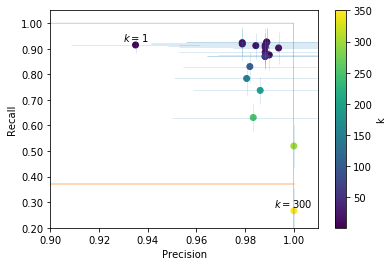

In [264]:
from matplotlib.ticker import FormatStrFormatter
# precision recall plot
# recall
xpl = knn_res[:,1,0]
# precision
ypl = knn_res[:,2,0]

xerr = knn_res[:,1,1]
yerr = knn_res[:,2,1]

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.errorbar(xpl, ypl, yerr, xerr, fmt='none', alpha=0.3, elinewidth=0.5)

plt.scatter(xpl, ypl, c=ks, label='k-NN')
plt.colorbar(format=FormatStrFormatter('%i'), label='k')

plt.plot([0,0.9999,1],[1,1,0], label='ideal', c='gray', alpha=0.8, linewidth=0.5)

plt.annotate(r"$k={}$", (xpl[0]-0.005, ypl[0]+0.015))
plt.annotate(r"$k={}".format(ks[-1]), (xpl[-1]-0.008, ypl[-1]+0.015))

# this line always needs to be updated depending on which N is used!
plt.plot([0,1], 2*[balance[1]/balance.sum()], label='guessing', alpha=0.4)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.xlim(0.9, 1.01)
plt.ylim(0.2, 1.05)

In [253]:
balance[1]/balance.sum()

0.37

In [ ]:
# very stable here even as we go to high k values
# usually might expect more sharply peaked behaviour
# hoewever of course breaks down for unreasonable k values
# just to show that it *is* working, show how it breaks down